Imports necessários


In [165]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split,KFold

Import do Dataset

In [166]:
# Nome das colunas
colunas = ['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
           'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']
# Import do csv
dataset = pd.read_csv("water_potability.csv", header=None, names=colunas)
# Limpando o Dataset
dataset = dataset.dropna()
# Separação dos atributos
X = dataset[['ph', 'hardness', 'solids', 'chloramines', 'sulfate',
             'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']]
Y = dataset.potability


In [167]:
kf = KFold(n_splits=10)

In [168]:
def especificidade(matriz):
    v_N = matriz[0,1]
    N = matriz[0,1]+matriz[1,1]
    return v_N/N

In [169]:
clf = DecisionTreeClassifier(criterion="entropy")
acuracias= []
for train, test in kf.split(X=X, y=Y):
    X_train = X.iloc[train]
    Y_train = Y.iloc[train]
    X_test = X.iloc[test]
    Y_test = Y.iloc[test]
    clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    acuracias.append( metrics.accuracy_score(Y_test,Y_pred))
    print(especificidade(metrics.confusion_matrix(Y_test,Y_pred)))

0.717391304347826
0.625
0.5230769230769231
0.5064935064935064
0.43
0.6704545454545454
0.6989247311827957
0.43037974683544306
0.4
0.43209876543209874


In [170]:
def soma_array(array):
    soma = 0
    for i in array:
        soma+=i
    return soma

In [171]:
def repeat_array(item,tam):
    array = []
    for i in range(0,tam):
        array.append(item)
    return array

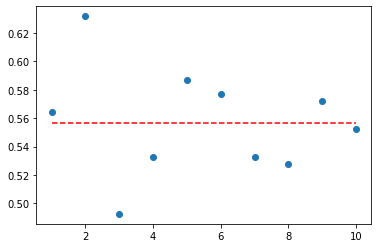

In [172]:

media  = soma_array(acuracias)/len(acuracias)
medias  = repeat_array(media,10)
plt.plot(range(1,11),medias,'r--')
plt.scatter(range(1,11),acuracias)
